<table style="width: 494px; height: 52px;" width="260">
<tbody>
<tr style="height: 52px;">
<td style="width: 484.667px; height: 52px;">
<h2><span style="color: #000080;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  <span style="color: #993300;">&nbsp; Algorithmique et&nbsp; Python</span></span></h2>
</td>
</tr>
</tbody>
</table>
<h2 style="text-align: center;"><span style="color: #993300; text-align: center;">&nbsp; Projet : Traitement d'une base de donn&eacute;es et classification&nbsp;</span></h2>

<p>&nbsp;</p>
<p><span style="color: #ff9900;"><strong>La base de donn&eacute;es :&nbsp;</strong></span></p>
<p>La&nbsp;<strong><a title="Liste rouge (conservation)" href="https://fr.wikipedia.org/wiki/Liste_rouge_(conservation)">liste rouge</a>&nbsp;de l'UICN</strong>&nbsp;(<a title="Union internationale pour la conservation de la nature" href="https://fr.wikipedia.org/wiki/Union_internationale_pour_la_conservation_de_la_nature">Union internationale pour la conservation de la nature</a>&nbsp;; en anglais IUCN<sup id="cite_ref-2" class="reference"></sup>&nbsp;<em>Red List</em>), cr&eacute;&eacute;e en 1964, constitue l'inventaire mondial le plus complet de&nbsp;<a title="Statut de conservation" href="https://fr.wikipedia.org/wiki/Statut_de_conservation">l'&eacute;tat de conservation</a>&nbsp;global des&nbsp;<a title="Esp&egrave;ce" href="https://fr.wikipedia.org/wiki/Esp%C3%A8ce">esp&egrave;ces</a>&nbsp;v&eacute;g&eacute;tales et animales. Elle se pr&eacute;sente sous la forme d'une base de donn&eacute;es en ligne r&eacute;guli&egrave;rement actualis&eacute;e, exposant la situation de plus de 105 732 esp&egrave;ces (version 2019<sup id="cite_ref-3" class="reference"></sup>) sur les 1,8 million d'esp&egrave;ces connues.</p>
<p>Elle est de plus en plus utilis&eacute;e pour alerter sur la r&eacute;gression de certaines esp&egrave;ces (ou leur disparition</p>

<p><strong><span style="color: #ff9900;">Les cat&eacute;gories de l'IUCN : </span></strong></p>

<img src="RED.png" alt="catégories" width="600" height="300"/>


<p><strong><span style="color: #ff9900;">Sommaire : </span></strong></p>


##### Nous allons dans ce projet appliquer 3 différentes méthodes de classification à notre base de données. 
1. Arbres de décision
2. Random Forest
3. SVM 
4. Conclusion 

##### Importation des librairies

In [1]:
import pandas as pd
import os 

from geopy.geocoders import Nominatim
import time
from pprint import pprint
###
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import plot_roc_curve

##
from sklearn.tree import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline




ImportError: cannot import name 'RandomizedSearchC' from 'sklearn.model_selection' (C:\Users\X1 CARBIN\Anaconda\lib\site-packages\sklearn\model_selection\__init__.py)

In [8]:
os.getcwd()

'C:\\Users\\X1 CARBIN\\Desktop\\RED_LIST\\projet_Python'

In [20]:
os.chdir('C:\\Users\\X1 CARBIN\\DATA CAMP\\TIDE\\RED-lists')

##### Importer les tables téléchargées selon les catégories 

In [22]:
Vulnerable = pd.read_csv ("Vulnerable.csv")
Near_Threatened= pd.read_csv ("Near Threatened.csv")
CRTICALLY_ENDANGERED=pd.read_csv ("CRTICALLY_ENDANGERED.csv")
Data_deficient=pd.read_csv ("Data deficient.csv")
ENDANGERED=pd.read_csv ("ENDANGERED.csv")
ETINCT_IN_WILD=pd.read_csv ("ETINCT_IN_WILD.csv")
EXTINCT=pd.read_csv ("EXTINCT.csv")
Least_Concern=pd.read_csv ("Least Concern.csv")

C:\Users\X1 CARBIN\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
mylist=[]

In [25]:
my_list = [A,B,C,D,E,F,G,H]
my_list[1]

Index(['assessment_id', 'id_no', 'binomial', 'presence', 'origin', 'seasonal',
       'compiler', 'year', 'citation', 'legend', 'subspecies', 'subpop',
       'dist_comm', 'island', 'tax_comm', 'source', 'basisofrec', 'event_year',
       'longitude', 'latitude'],
      dtype='object')

In [29]:
Vulnerable['Name']='Vulnerable'

In [65]:
Vulnerable['Name']='Vulnerable'
Near_Threatened['Name']='NEAR_THREATENED'
CRTICALLY_ENDANGERED['Name']='CRTICALLY_ENDANGERED'
ENDANGERED['Name']='ENDANGERED'
ETINCT_IN_WILD['Name']='ETINCT_IN_WILD'
EXTINCT['Name']='EXTINCT'
Data_deficient['Name']='DATA_DEFICIENT'

##### Concaténation de toutes les tables en  ajoutant  une variable Red List catégorie 

In [66]:
frames = [Vulnerable, Near_Threatened, CRTICALLY_ENDANGERED,ENDANGERED,ETINCT_IN_WILD,EXTINCT,Data_deficient]

In [67]:
fd = pd.concat(frames,sort=False)

In [100]:
fd.rename(columns={'Name':'Red List Category'}, inplace=True)

In [ ]:
fd.head()

In [ ]:
fd.rename(columns={"Name": "Red List Category"})

In [ ]:
fd['Red List Category'].value_counts()


##### Extraction des pays 
Grâce aux variables latitude et longitude nous retrouvons les pays des observations.

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
def get_country(row):
    try:
        location = geolocator.reverse(str(row['latitude']) + ', ' + str(row['longitude']))
        return location.raw['address']['country']
    except :
        pass

In [ ]:
ETINCT_IN_WILD['country'] =ETINCT_IN_WILD.apply(lambda row: get_country(row), axis = 1)
ETINCT_IN_WILD

In [ ]:
fd['country'] =fd.apply(lambda row: get_country(row), axis = 1)

##### On regroupe ensuite les observations 

In [ ]:
col_to_group=['assessment_id','binomial','presence','origin','seasonal','legend','Red List Category','country']

In [ ]:
data.groupby(col_to_group).agg('count')

<h2><span style="color: #993300;"><strong>Classification&nbsp;</strong></span></h2>

### 1.  Arbre de décision

On utilise notre base de donnée après le regroupement.

In [4]:
test = pd.read_csv ("test.csv") #base clean (après regroupement)
test

NameError: name 'pd' is not defined

On choisit les 4 variables pour construire notre modèle après.

In [69]:
data=test[['presence','origin','seasonal','Red List Category']]
data

,presence,origin,seasonal,Red List Category
0,1,1,1,CRTICALLY_ENDANGERED
1,1,1,1,CRTICALLY_ENDANGERED
2,1,1,1,Vulnerable
3,1,1,1,Vulnerable
4,1,1,1,CRTICALLY_ENDANGERED
5,1,1,1,CRTICALLY_ENDANGERED
6,1,1,1,CRTICALLY_ENDANGERED
7,4,1,1,CRTICALLY_ENDANGERED
8,4,1,1,CRTICALLY_ENDANGERED
9,1,1,1,ENDANGERED


<p><span style="color: rgb(251, 160, 38);"><u>Construction d&apos;arbre</u></span></p>

In [70]:
X=data[['presence', 'origin', 'seasonal']]  # Features
y=data['Red List Category']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
clf_tree = DecisionTreeClassifier(random_state=1)
clf_tree = clf_tree.fit(X_train,y_train)
clf_tree.predict(X_test)

array(['Vulnerable', 'Vulnerable', 'Vulnerable', ..., 'Vulnerable',
       'Vulnerable', 'Vulnerable'], dtype=object)

In [170]:
Y_pred = clf_tree.predict(X_test)

cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
cr=classification_report(y_test,Y_pred)
print("\nPrécision du SVM pour l’ensemble de données donné : ", accuracy)
print(cm)
print(cr)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.35760288178146493
[[   3    0    5    0    1  468]
 [   1   31    0    0    7  830]
 [   0    1   13    0   18 2351]
 [   0    0    3    0    0    0]
 [   0    3    8    0   26 2155]
 [   0    8   10    0   16 3203]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.75      0.01      0.01       477
      DATA_DEFICIENT       0.72      0.04      0.07       869
          ENDANGERED       0.33      0.01      0.01      2383
             EXTINCT       0.00      0.00      0.00         3
     NEAR_THREATENED       0.38      0.01      0.02      2192
          Vulnerable       0.36      0.99      0.52      3237

            accuracy                           0.36      9161
           macro avg       0.42      0.17      0.11      9161
        weighted avg       0.41      0.36      0.20      9161



L'affichage graphique de l'arbre.

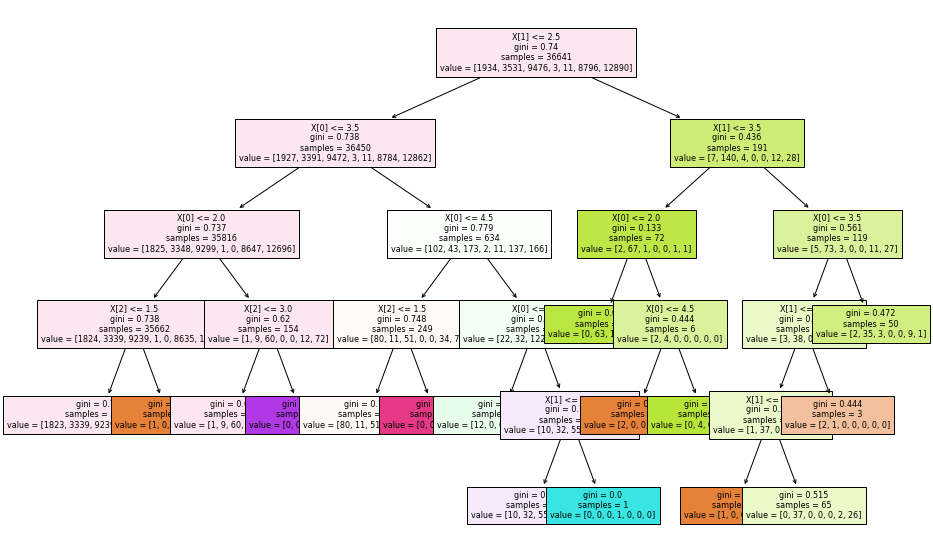

In [123]:
#plot_tree(clf) 

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(clf, fontsize=8, filled=True)

plt.show()

On a 15 feuilles en total donc 15 règles.Il produit donc 15 règles prédictives matérialisées par les chemins partant de la racine aux feuilles.

### Deux classes

Dans cette partie, au lieux de 6 classes, on regroupe en 2 classes pour faire la classification binaire.

Informations sur les deux groupes.

In [71]:
clean= {"Red List Category":{"Vulnerable": 1, 
                             "NEAR_THREATENED":1,
                             "ENDANGERED":1, 
                             "CRTICALLY_ENDANGERED":0,
                             "ETINCT_IN_WILD":0, 
                             "EXTINCT":0}}

data_deux_catégories=test[['presence','origin','seasonal','Red List Category']]
data_deux_catégories = data_deux_catégories.drop(data_deux_catégories[data_deux_catégories['Red List Category']=='DATA_DEFICIENT'].index)
data_deux_catégories.replace(clean, inplace=True)
#data_deux_catégories.head()
data_deux_catégories["Red List Category"].value_counts()

#Pour la partie SVM, on avait oublié d'enlevé la catégorie data_deficient, ce qui explique pourquoi le résultat n'était pas cohérent avec la partie Random forest


1    38964
0     2418
Name: Red List Category, dtype: int64

In [72]:
data_deux_catégories.isnull().sum()

presence             0
origin               0
seasonal             0
Red List Category    0
dtype: int64

Partition en échantillons d’apprentissage et de test

In [73]:
X=data_deux_catégories[['presence', 'origin', 'seasonal']]  # Features
y=data_deux_catégories['Red List Category']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test


In [174]:
clf_tree = DecisionTreeClassifier(random_state=1)
clf_tree = clf_tree.fit(X_train,y_train)
clf_tree.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Affichage graphique de l'arbre

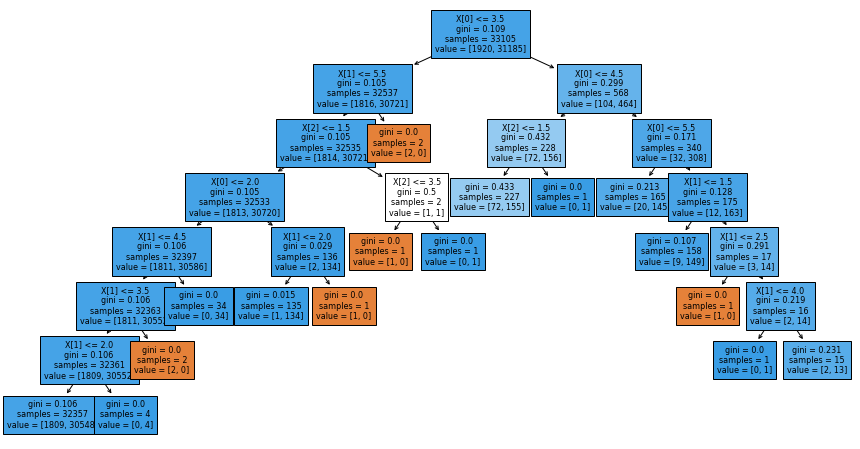

In [161]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(clf, fontsize=8,filled=True)

plt.show()

Prédiction en test

In [175]:
Y_pred = clf_tree.predict(X_test)

cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
cr=classification_report(y_test,Y_pred)
print("\nPrécision du SVM pour l’ensemble de données donné : ", accuracy)
print(cm)
print(cr)


Précision du SVM pour l’ensemble de données donné :  0.943095324392896
[[   2  471]
 [   0 7804]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       473
           1       0.94      1.00      0.97      7804

    accuracy                           0.94      8277
   macro avg       0.97      0.50      0.49      8277
weighted avg       0.95      0.94      0.92      8277



Importance des variables

In [176]:
clf.feature_importances_

array([0.71029964, 0.24612189, 0.04357847])

Affichage graphiques de l'importance des variables

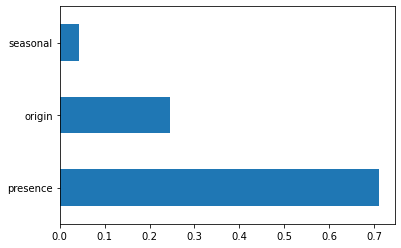

In [177]:
ps=data_deux_catégories[['presence','origin','seasonal']]
feat_importances = pd.Series(clf.feature_importances_, index=ps.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

### 2. Random Forest
Nous commençons par diviser nos données en deux bases : une base entrainement et une base test.

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
#on split nos données à 80% pour le training test et 20% pour le test set 

NameError: name 'train_test_split' is not defined

On crée ensuite un classificateur gaussien

In [76]:
clf=RandomForestClassifier(n_estimators=100)

On entraine ensuite le modèle et on lance la prédiction

In [79]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#### Calcul du score 

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
#importation des paramètres de précision

In [6]:
accuracy_score(y_test, y_pred)
print(f"la précision du modèle est  {round(accuracy_score(y_test,y_pred),3)*100} %")

NameError: name 'y_test' is not defined

In [80]:
train_probs = clf.predict_proba(X_train)[:,1] 
probs = clf.predict_proba(X_test)[:, 1]
train_predictions = clf.predict(X_train)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### Importance des variables 

In [102]:
clf.feature_importances_

array([0.78222906, 0.17285406, 0.04491689])

La variable la plus importante est présente.

##### La courbe ROC Random Forest

In [100]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Random_roc_auc = roc_auc_score(y_test, clf.predict(X_test))

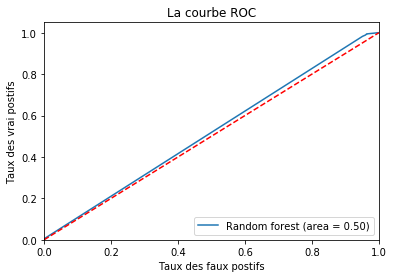

In [101]:

fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % Random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux des faux postifs')
plt.ylabel('Taux des vrai postifs')
plt.title('La courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Forest_ROC')
plt.show()

##### AUC du train et test set 
On cherche à mesurer la qualité des précisions du modèle quel que soit le seuil de classification sélectionné, on choisi donc d'analyser l'AUC qui correspond à l'aire sous la courbe ROC.

In [71]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.513295340102665
Test ROC AUC  Score: 0.5128736577965322


On constate que les AUC du modèle (train et test) sont de 0,51 ce qui signifie qu'un peu plus de la moitié des prédictions du modèle sont correctes. 

#### Évaluation des performances
Afin d'obtenir une meilleure vue d'ensemble nous effectuons une validation croisée.

In [4]:
# Évaluation du modèle par validation croisée 
rfc_cv_score = cross_val_score(rfc, X, y, cv=3, error_score='roc_auc')

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
accuracy_score(y_test, rfc_predict)
print(f"la précision du modèle est  {round(accuracy_score(y_test,rfc_predict),3)*100} %")

NameError: name 'cross_val_score' is not defined

In [61]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[   0    1    2    0    2  511]
 [   0   37    0    0    5  860]
 [   0    1   25    0   14 2298]
 [   0    0    2    0    0    0]
 [   0    2    5    0   21 2155]
 [   0    8   15    0   11 3186]]


=== Classification Report ===
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.00      0.00      0.00       516
      DATA_DEFICIENT       0.76      0.04      0.08       902
          ENDANGERED       0.51      0.01      0.02      2338
             EXTINCT       0.00      0.00      0.00         2
     NEAR_THREATENED       0.40      0.01      0.02      2183
          Vulnerable       0.35      0.99      0.52      3220

            accuracy                           0.36      9161
           macro avg       0.34      0.18      0.11      9161
        weighted avg       0.42      0.36      0.20      9161



=== All AUC Scores ===
[0.35093005 0.3568481  0.35147704]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.3

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Selon le score du roc_auc la précision du modèle est de 35,3% ce qui est faible.





On cherche les meilleurs estimateurs afin d'optimiser nos hyperparamètres.

On se concentre sur 3 hyperparamètres : n_estimators, max_features, max_depth.

In [50]:

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [53]:
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, refit='TRUE', random_state=42, n_jobs = -1)


# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.4min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
# print results
print(rfc_random.best_params_)

{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 260}


On remplace les estimations trouvées dans la nouvelle classification.

In [56]:
rfc = RandomForestClassifier(n_estimators=800, max_depth=260, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=3, error_score='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[  20    0    5    0    0    3  448]
 [   3   30    0    0    0    7  818]
 [  11    1   18    0    0   13 2312]
 [   0    0    0    0    0    1    0]
 [   0    0    4    0    0    0    0]
 [   5    4    4    0    0   17 2146]
 [  27    6   15    0    0   11 3232]]


=== Classification Report ===
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.30      0.04      0.07       476
      DATA_DEFICIENT       0.73      0.03      0.07       858
          ENDANGERED       0.39      0.01      0.01      2355
      ETINCT_IN_WILD       0.00      0.00      0.00         1
             EXTINCT       0.00      0.00      0.00         4
     NEAR_THREATENED       0.33      0.01      0.02      2176
          Vulnerable       0.36      0.98      0.53      3291

            accuracy                           0.36      9161
           macro avg       0.30      0.15      0.10      9161
        weighted avg       0.39      0.36      0.21   

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Malgré notre sélection de paramètre la qualité de précision de notre modèle reste inchangé.

## 3. Classifaction SVM 

In [23]:
X= data.iloc[:,0:3].values
print(X_train)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [184]:
#Splitting the dataset into training and test samples

training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

#Classifying the predictors and target
X_train = training_set.iloc[:,0:3].values
Y_train = training_set.iloc[:,3].values
X_test = test_set.iloc[:,0:3].values
Y_test = test_set.iloc[:,3].values

classifier = SVC(kernel='rbf', random_state = 4)
clf = SVC(kernel='linear',random_state = 4)

In [185]:
print(Y_test)

['Vulnerable' 'Vulnerable' 'CRTICALLY_ENDANGERED' ... 'NEAR_THREATENED'
 'CRTICALLY_ENDANGERED' 'CRTICALLY_ENDANGERED']


In [186]:
#Prediction des classes pour test_set == SVC(kernel='rbf')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
test_set["Predictions"] = Y_pred
test_set

<ipython-input-186-6179cc9092fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


,presence,origin,seasonal,Red List Category,Predictions
16859,1,1,1,Vulnerable,Vulnerable
25237,1,1,1,Vulnerable,Vulnerable
45485,1,1,1,CRTICALLY_ENDANGERED,Vulnerable
36580,4,1,1,CRTICALLY_ENDANGERED,Vulnerable
1475,1,1,1,DATA_DEFICIENT,Vulnerable
...,...,...,...,...,...
18957,1,1,1,NEAR_THREATENED,Vulnerable
21713,1,1,1,DATA_DEFICIENT,Vulnerable
5470,6,5,1,NEAR_THREATENED,DATA_DEFICIENT
628,1,1,1,CRTICALLY_ENDANGERED,Vulnerable


In [187]:
#exactitude des prédictions

cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
cr=classification_report(Y_test,Y_pred)
print("\nPrécision du SVM pour l’ensemble de données donné : ", accuracy)
print(cm)
print(cr)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.35323654622857764
[[   1    0    2    0    2  478]
 [   1   36    0    0    7  849]
 [   0    1   15    0   18 2378]
 [   0    0    5    0    0    0]
 [   0    4   10    0   16 2134]
 [   0   11   11    0   14 3168]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.50      0.00      0.00       483
      DATA_DEFICIENT       0.69      0.04      0.08       893
          ENDANGERED       0.35      0.01      0.01      2412
             EXTINCT       0.00      0.00      0.00         5
     NEAR_THREATENED       0.28      0.01      0.01      2164
          Vulnerable       0.35      0.99      0.52      3204

            accuracy                           0.35      9161
           macro avg       0.36      0.17      0.10      9161
        weighted avg       0.38      0.35      0.20      9161



On a une précision de 0.35, ce qui est déjà meilleur que le hasard.
Dans la matrice de confusion, on voit qu'il y a 483 points dans la classe 1 ("CRTICALLY_ENDANGERED"), cependant seulement 1 point a été correctement prédit. 2 points ont été marqué comme classe 3 et 5 ("ENDANGERED" et "NEAR_THREATENED") et 478 point marqués comme classe 6 ("Vulnerable"). On voit que le modèle a tendance classer les points dans la catégorie 'Vulnerable'. Il est de même pour la prédiction des autres classes ou l'on retrouve la majorité des points marqués dans la classe 6.

In [188]:
#SVC(kernel='linear')

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
score = clf.score(X_train, Y_train)
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
cr=classification_report(Y_test,Y_pred)
print("\nPrécision du SVM pour l’ensemble de données donné : ", accuracy)
print(cm)
print(cr)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.3531273878397555
[[   0    1   33    0    0  449]
 [   0   37   10    0    0  846]
 [   0    1   50    0    0 2361]
 [   0    0    5    0    0    0]
 [   0    4   33    0    0 2127]
 [   0   11   45    0    0 3148]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.00      0.00      0.00       483
      DATA_DEFICIENT       0.69      0.04      0.08       893
          ENDANGERED       0.28      0.02      0.04      2412
             EXTINCT       0.00      0.00      0.00         5
     NEAR_THREATENED       0.00      0.00      0.00      2164
          Vulnerable       0.35      0.98      0.52      3204

            accuracy                           0.35      9161
           macro avg       0.22      0.17      0.11      9161
        weighted avg       0.26      0.35      0.20      9161



On peut faire la même remarque que précédement.
Cette fois ci, avec un noyau linéaire, plus de points sont classés dans la classe 3 mais très faible comparé a la classe 6.
Par exemple, précédement, parmi les 2412 points de la classe 3, 15 points ont été correctement prédis. Avec un noyau linéaire, on atteint jusqu'à 50 points. Mais ca reste très faible puisqu'il y a encore 2361 points qui est classé dans la classe 6.

Remarque: il y a normalement 7 classes, le résultat des deux algorithmes ne montrent que 6 classes. La classe "ETINCT_IN_WILD" qui ne contient que 3 observations n'a pas été intégré.

##### Réequilibrage du poids des classes

On essaie maintenant d'appliquer les mêmes algorithmes sur le même échantillon, en équillibrant le poids de chaque classe.
On le force à prédire plus souvent les classes minoritaires.

In [189]:
classifier=[SVC(kernel='rbf', random_state = 4,class_weight='balanced'), 
            SVC(kernel='linear', random_state = 4,class_weight='balanced'),
            LinearSVC(verbose=0,class_weight='balanced')]

In [190]:
for i in classifier:
    i.fit(X_train,Y_train)
    Y_pred = i.predict(X_test)
    cm = confusion_matrix(Y_test,Y_pred)
    cr=classification_report(Y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(Y_test)
    print("\nPrécision du SVM pour l’ensemble de données donné : ", accuracy)
    print(cm)
    print(cr)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.24211330640759743
[[  30    2    0    2  449    0]
 [   4   43    0    0  846    0]
 [  17   19   15   15 2346    0]
 [   0    0    0    5    0    0]
 [   7   20    2   10 2125    0]
 [  20   25   18   11 3130    0]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.38      0.06      0.11       483
      DATA_DEFICIENT       0.39      0.05      0.09       893
          ENDANGERED       0.43      0.01      0.01      2412
             EXTINCT       0.12      1.00      0.21         5
     NEAR_THREATENED       0.24      0.98      0.38      2164
          Vulnerable       0.00      0.00      0.00      3204

            accuracy                           0.24      9161
           macro avg       0.26      0.35      0.13      9161
        weighted avg       0.23      0.24      0.11      9161



C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.3494160026198013
[[  29    1    0    0    4    0  449]
 [   3   37    0    0    7    0  846]
 [  32    1    0    0   33    0 2346]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    5    0    0]
 [   9    4    0    0   26    0 2125]
 [  38   10    0    1   25    0 3130]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.26      0.06      0.10       483
      DATA_DEFICIENT       0.70      0.04      0.08       893
          ENDANGERED       0.00      0.00      0.00      2412
      ETINCT_IN_WILD       0.00      0.00      0.00         0
             EXTINCT       0.05      1.00      0.10         5
     NEAR_THREATENED       0.00      0.00      0.00      2164
          Vulnerable       0.35      0.98      0.52      3204

            accuracy                           0.35      9161
           macro avg       0.19      0.30      0.11      9161
        weighted avg       0.20      0

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Précision du SVM pour l’ensemble de données donné :  0.3452679838445585
[[  33    0    0    1    0    0  449]
 [  10    0    0   37    0    0  846]
 [  65    0    0    1    0    0 2346]
 [   0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0]
 [  35    0    0    4    0    0 2125]
 [  63    0    0   11    0    0 3130]]
                      precision    recall  f1-score   support

CRTICALLY_ENDANGERED       0.16      0.07      0.10       483
      DATA_DEFICIENT       0.00      0.00      0.00       893
          ENDANGERED       0.00      0.00      0.00      2412
      ETINCT_IN_WILD       0.00      0.00      0.00         0
             EXTINCT       0.00      0.00      0.00         5
     NEAR_THREATENED       0.00      0.00      0.00      2164
          Vulnerable       0.35      0.98      0.52      3204

            accuracy                           0.35      9161
           macro avg       0.07      0.15      0.09      9161
        weighted avg       0.13      0

La classification avec le noyau "Rbf" donne une précision de 0.24 ce qui a diminué de manière importante (si l'on compare aux deux autres méthodes utilisées). On a seulement 6 classes comme précédement. Cependant, on voit que contrairement a précédement, les points n'ont plus une tendance a être classé dans la classe "Vulnerable" mais plutôt dans la classe "NEAR_THREATENED".

La classification avec le noyau linéaire ou avec linearSVC donne un résultat assez proche par rapport a précédement avec une précision d'environ 0.34 avec les points qui ont tendance à être classé dans la classe "Vulnerable". On a cette fois-ci les 7 classes mais dans l'échantillon il n'y a pas de point appartenant à la classe "ETINCT_IN_WILD".

Pour une classification de 7 classes, un accuracy de 0.34 est acceptable.

##### Classification en deux catégories 

Maintenant, on essaie de travailler sur des classes binaires, on regroupe donc en 2 classes.

In [191]:
training_set, test_set = train_test_split(data_deux_catégories, test_size = 0.2, random_state = 1)

#Classifying the predictors and target
X_train = training_set.iloc[:,0:3].values
Y_train = training_set.iloc[:,3].values
X_test = test_set.iloc[:,0:3].values
Y_test = test_set.iloc[:,3].values

In [192]:
#SVC linéaire

lsvc = LinearSVC(verbose=0)
lsvc.fit(X_train, Y_train)
score = lsvc.score(X_train, Y_train)
print("Score: ", score)

Score:  0.9413079595227307


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Un accuracy de 0.94 ce qui très élevé, mais à comparer avec les autres algorithmes.
Cela est sûrement dû au déséquilibre des 2 classes.

In [193]:

cv_scores = cross_val_score(lsvc, X_train, Y_train, cv=5)
print("CV average score: %.2f" % cv_scores.mean())

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


CV average score: 0.94


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Vérifions la fiabilité de la méthode d'apprentissage avec la validation croisée, on obtient 0.94 comme précédement.

In [194]:
ypred = lsvc.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)

[[   0  475]
 [   0 7802]]


cr = classification_report(Y_test, ypred)
print(cr)

Parmi les 475 points de la classe 0, aucun point a été correctement prédit. Les points ont tendance à être marqué dans la classe 1. La précision a été tiré vers le haut par la classe 1, puisque tous les points ont été marqué dans la bonne classe. Entre autre, on arrive pas à prédire la classe 0.

In [196]:
#SVC linéaire

lsvc = LinearSVC(verbose=0,class_weight='balanced')
lsvc.fit(X_train, Y_train)
score = lsvc.score(X_train, Y_train)
print("Score: ", score)

Score:  0.9257816039873131


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [197]:
ypred = lsvc.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)
cr = classification_report(Y_test, ypred)
print(cr)

[[  30  445]
 [ 179 7623]]
              precision    recall  f1-score   support

           0       0.14      0.06      0.09       475
           1       0.94      0.98      0.96      7802

    accuracy                           0.92      8277
   macro avg       0.54      0.52      0.52      8277
weighted avg       0.90      0.92      0.91      8277



En rééquilibrant les classes, l'accuracy a baissé à 0.92, mais on le modèle a prédit correctement 30 points dans classe 0 alors que précédement le modèle ne prédissait aucun point dans la classe 0.

<p><span style="color: rgb(251, 160, 38); font-size: 16px;"><u>Courbe ROC</u></span></p>

In [203]:
lsvc = LinearSVC(verbose=0)
classifier_rbf=SVC(kernel='rbf', random_state = 4)
classifier_linear=SVC(kernel='linear', random_state = 4)
clf_tree = DecisionTreeClassifier(random_state=1)

lsvc.fit(X_train, Y_train)
classifier_rbf.fit(X_train, Y_train)
classifier_linear.fit(X_train, Y_train)
clf_tree.fit(X_train, Y_train)


y_pred_lscv = lsvc.predict(X_test)
y_pred_rbf=classifier_rbf.predict(X_test)
y_pred_linear=classifier_linear.predict(X_test)
y_pred_tree=clf_tree.predict(X_test)

fpr_lsvc, tpr_lsvc, thresholds_lsvc= roc_curve(y_test, y_pred_lscv)
fpr_rbf, tpr_rbf, thresholds_rbf= roc_curve(y_test, y_pred_rbf)
fpr_svc_linear, tpr_svc_linear, thresholds_linear= roc_curve(y_test, y_pred_linear)
fpr_svc_tree, tpr_svc_tree, thresholds_tree= roc_curve(y_test, y_pred_tree)


#probs = clf.predict_proba(X_test)
#preds = probs[:,1]
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr_lsvc, tpr_lsvc)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


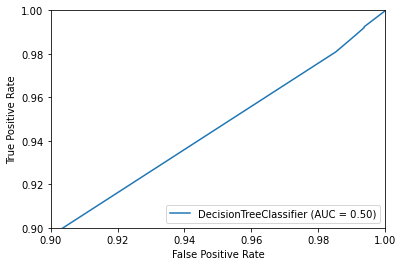

In [209]:
svc_disp = plot_roc_curve(clf_tree, X_test, y_test)
#svc_disp = plot_roc_curve(classifier_linear, X_test, y_test)


plt.xlim(0.9, 1)
plt.ylim(0.9, 1)
plt.show()

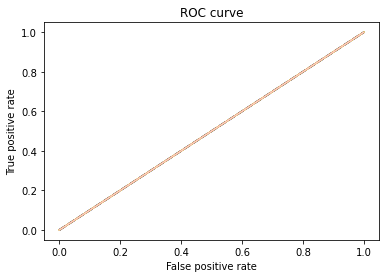

In [212]:
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
#plt.xlim(0.9, 1)
#plt.ylim(0.9, 1)
#plt.plot(fpr,c='blue')
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.plot(fpr_lsvc,tpr_lsvc,c='red', label='lscv')
plt.plot(fpr_svc_tree,tpr_svc_tree,c='green', label='tree')
plt.plot(fpr_svc_linear,tpr_svc_linear,c='yellow', label='linear')
plt.plot(fpr_rbf,tpr_rbf,c='pink', label='rbf')

plt.show()

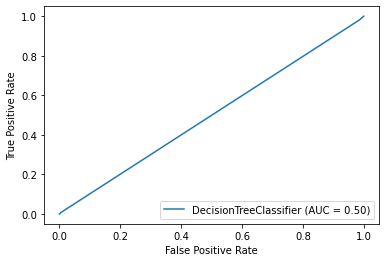

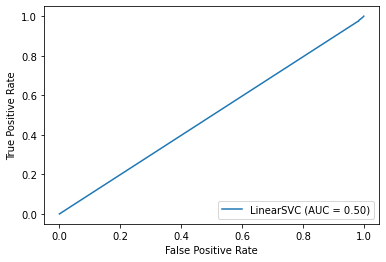

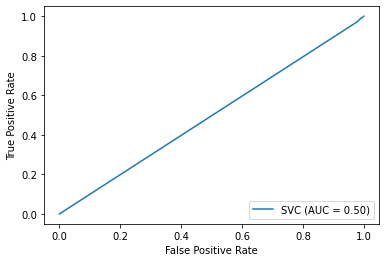

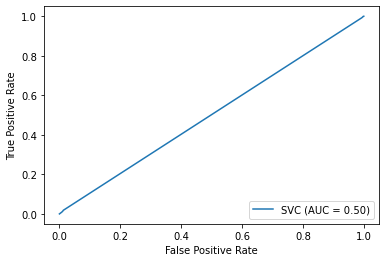

In [215]:
svc_disp = plot_roc_curve(clf_tree, X_test, y_test)
svc_disp = plot_roc_curve(lsvc, X_test, y_test)
svc_disp = plot_roc_curve(classifier_rbf, X_test, y_test)
svc_disp = plot_roc_curve(classifier_linear, X_test, y_test)

plt.show()

L'AUC est de 0,5. En d’autres termes, notre modèle est précis à 50% pour les cas et leur classification. Le modèle n’a aucune capacité de discrimination en l’espèce.
D’après le diagramme de courbe roc AUC, la zone entre roc et l’axe est de 0,5. Ce n’est toujours pas le pire modèle, il est un peut mieux que le pure hasard.
Cela peut être dû soit au déséquilibre des classes, soit il n'y a pas assez de corrélation entre les variables pour pouvoir classifier.

<p style="margin: 0cm 0cm 8pt; line-height: 107%; font-size: 15px; font-family: Calibri, sans-serif; text-align: justify;"><br></p>
<p style="margin: 0cm 0cm 8pt; line-height: 107%; font-size: 15px; font-family: Calibri, sans-serif; text-align: justify;"><br></p>
<p style="margin: 0cm 0cm 8pt; line-height: 107%; font-size: 15px; font-family: Calibri, sans-serif; text-align: justify;"><span style="color: rgb(243, 121, 52);"><strong><span style="font-size: 22px;">Conclusion :</span></strong>&nbsp;</span></p>
<p style="margin: 0cm 0cm 8pt; line-height: 107%; font-size: 15px; font-family: Calibri, sans-serif; text-align: justify;"><span style="font-size: 17px;">Nous avons dans ce projet &eacute;tudi&eacute; une base de donn&eacute;es r&eacute;pertoriant des esp&egrave;ces v&eacute;g&eacute;tales en x cat&eacute;gories d&apos;esp&egrave;ces. Le but &eacute;tant de comparer diff&eacute;rentes m&eacute;thodes de classification permettant de pr&eacute;dire les esp&egrave;ces. &nbsp;Pour cela nous avons appliqu&eacute; 3 m&eacute;thodes diff&eacute;rentes : Les arbres de d&eacute;cision, le Random Forest avec validation crois&eacute;e et enfin le SVM. Les r&eacute;sultats sont diff&eacute;rents en fonction des m&eacute;thodes retenues. On obtient avec les arbres de d&eacute;cision une accuracy de 0.357 et 0.943 pour 6 classes et 2 classes respectivement , avec le Random Forest on obtient une pr&eacute;cision de 0.353 et 0.941. On obtient avec le SVM une pr&eacute;cision de 0.353 lorsqu&apos;on essaie de pr&eacute;dire 6 classes et 0.94 pour 2 classes. Avec la m&eacute;thode SVM en r&eacute;&eacute;quilibrant le poids des classes, l&apos;accuracy &agrave; diminuer (0.34 et 0.92) ce qui &eacute;tait attendu. Le score d&apos;accuracy pour les 3 mod&egrave;les sont tr&egrave;s proche, que ce soit pour 6 classes ou pour 2 classes.</span></p>
<p style="margin: 0cm 0cm 8pt; line-height: 107%; font-size: 15px; font-family: Calibri, sans-serif; text-align: justify;"><br></p>